![Species](https://drive.google.com/uc?export=view&id=1dIxkgeuvQb6sVyTHZFeyIvjSztGL8ySH)

![Body Parts of a Penguin](https://drive.google.com/uc?export=view&id=1hr1nxYIbi3lDEWoVb3YRyDxIvi9KkFT-)

![Culmen of a Penguin](https://drive.google.com/uc?export=view&id=1VJn67zNSZ3k2wy_vTwDNIWshrlupsYZR)

In [ ]:
# importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# to ignore the warnings
from warnings import filterwarnings

In [ ]:
# loading dataset
data = pd.read_csv("https://raw.githubusercontent.com/RealMosam/TeachNook/main/penguins_size.csv")
#  Check information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


**Columns in the dataset:**
1. Species: penguin species (Chinstrap, Adélie, or Gentoo)
2.  Island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
3. culmen_length_mm: culmen length (mm)
4. culmen_depth_mm: culmen depth (mm)
5. flipper_length_mm: flipper length (mm)
6. body_mass_g: body mass (g)
7. Sex: penguin sex




In [ ]:
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


**Performing Exploratory Data Analysis (EDA)**

<AxesSubplot:xlabel='species', ylabel='count'>

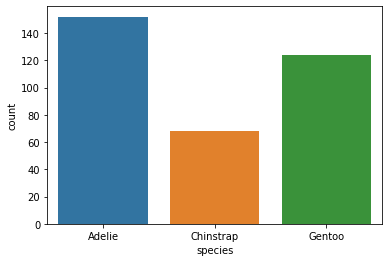

In [ ]:
sns.countplot(x='species', data=data)
# Our data is not balanced. As data is not big enough so no need to balance it.

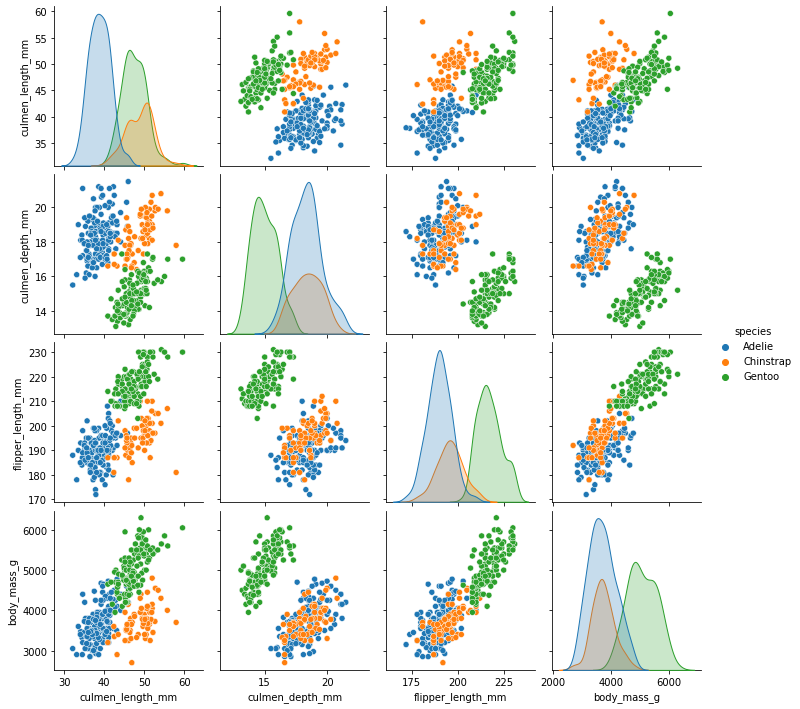

In [ ]:
sns.pairplot(data,hue='species')

We can see clusters are easily separable in the cases:

    culmen_length_mm vs culmen_depth_mm ;
    culmen_length_mm vs flipper_length_mm ;
    culmen_length_mm vs body_mass_g.

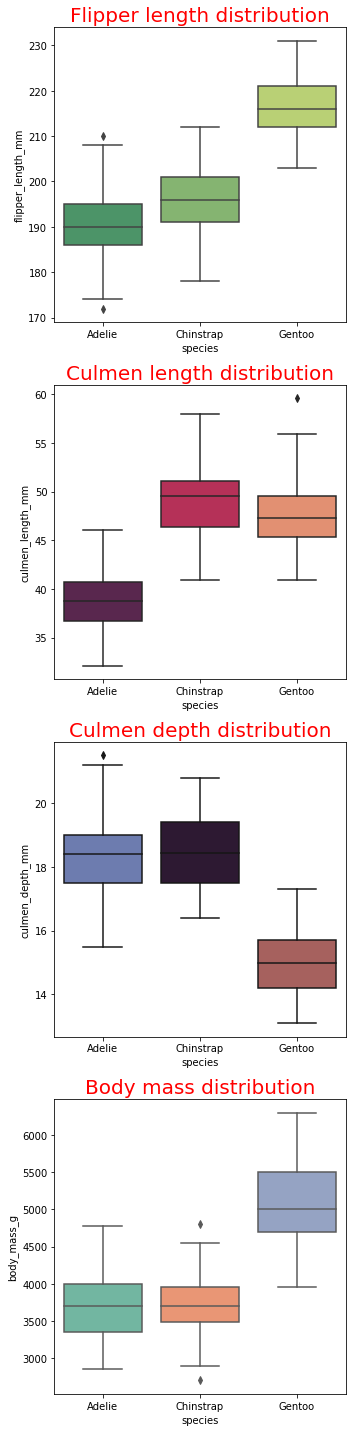

In [ ]:
# Exploring distribution of our data
fig,axes=plt.subplots(4,1,figsize=(5,20))
sns.boxplot(x=data.species,y=data.flipper_length_mm,ax=axes[0],palette='summer')
axes[0].set_title("Flipper length distribution",fontsize=20,color='Red')
sns.boxplot(x=data.species,y=data.culmen_length_mm,ax=axes[1],palette='rocket')
axes[1].set_title("Culmen length distribution",fontsize=20,color='Red')
sns.boxplot(x=data.species,y=data.culmen_depth_mm,ax=axes[2],palette='twilight')
axes[2].set_title("Culmen depth distribution",fontsize=20,color='Red')
sns.boxplot(x=data.species,y=data.body_mass_g,ax=axes[3],palette='Set2')
axes[3].set_title("Body mass distribution",fontsize=20,color='Red')
plt.tight_layout()

In [ ]:
print("Mean body mass index distribution")
data.groupby(['species','sex']).mean()['body_mass_g'].round(2)

Mean body mass index distribution


species    sex   
Adelie     FEMALE    3368.84
           MALE      4043.49
Chinstrap  FEMALE    3527.21
           MALE      3938.97
Gentoo     .         4875.00
           FEMALE    4679.74
           MALE      5484.84
Name: body_mass_g, dtype: float64

In [ ]:
# Checking for any missing values
100*data.isnull().sum()/len(data)

species              0.000000
island               0.000000
culmen_length_mm     0.581395
culmen_depth_mm      0.581395
flipper_length_mm    0.581395
body_mass_g          0.581395
sex                  2.906977
dtype: float64

*  Percentage of missing data is very less.
*   Let's impute it with median in numerical features and mode in categorical feature.
*  Here, I have used '.fillna' method from pandas library.

In [ ]:
data['sex'].fillna(data['sex'].mode()[0],inplace=True)
col_to_be_imputed = ['culmen_length_mm', 'culmen_depth_mm','flipper_length_mm', 'body_mass_g']
for item in col_to_be_imputed:
    data[item].fillna(data[item].mean(),inplace=True)

In [ ]:
# Dealing with categorical features
data.species.value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [ ]:
data.island.value_counts()

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

In [ ]:
data.sex.value_counts()

MALE      178
FEMALE    165
.           1
Name: sex, dtype: int64

In [ ]:
# Where did this '.' entry came from?
data[data['sex']=='.']

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [ ]:
data.loc[336,'sex'] = 'FEMALE' # Setting 'sex' of 336 row to "Female"

In [ ]:
data.sex.value_counts() # Missing value updated

MALE      178
FEMALE    166
Name: sex, dtype: int64

In [ ]:
# Target variables can also be encoded using sklearn.preprocessing.LabelEncoder
data['species']=data['species'].map({'Adelie':0,'Gentoo':1,'Chinstrap':2})

# Creating dummy variables for categorical features
dummies = pd.get_dummies(data[['island','sex']],drop_first=True)

In [ ]:
# Normalizing/ Standardizing feature variables
df_to_be_scaled = data.drop(['island','sex'],axis=1)
target = df_to_be_scaled.species
df_feat= df_to_be_scaled.drop('species',axis=1)

In [ ]:
# Using StandardScaler for normalizing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_feat)
df_scaled = scaler.transform(df_feat)
df_scaled = pd.DataFrame(df_scaled,columns=df_feat.columns[:4])
df_preprocessed = pd.concat([df_scaled,dummies,target],axis=1)
df_preprocessed.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE,species
0,-8.870812e-01,7.877425e-01,-1.422488,-0.565789,0,1,1,0
1,-8.134940e-01,1.265563e-01,-1.065352,-0.503168,0,1,0,0
2,-6.663195e-01,4.317192e-01,-0.422507,-1.192003,0,1,0,0
3,-1.307172e-15,1.806927e-15,0.000000,0.000000,0,1,1,0
4,-1.328605e+00,1.092905e+00,-0.565361,-0.941517,0,1,0,0


*   Hence, our EDA is now complete.
*   Now we shall apply suitable algorithm for model building.

**K-Nearest Neighbours**
*  It is a supervised learning algorithm which can be used for both classification and regression predictive problems.
*   However, it is more widely used in classification problems in the industry.
* With the given data, KNN can classify new, unlabelled data by analysis of the k number of the nearest data points.




In [ ]:
# Using KNeighborsClassifier from sklearn for KNN model building
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# We need to split data for supervised learning models.
X_train, X_test, y_train, y_test = train_test_split(df_preprocessed.drop('species',axis=1),target,random_state=0, test_size=0.50)

# Here 'k' value is '1'
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
preds_knn = knn.predict(X_test)
print(confusion_matrix(y_test,preds_knn))

[[73  0  1]
 [ 1 60  0]
 [ 0  0 37]]


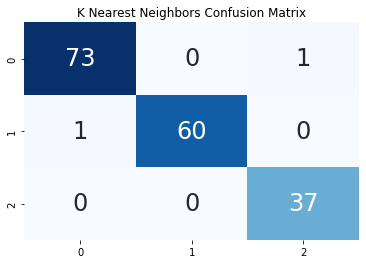

In [ ]:
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(confusion_matrix(y_test,preds_knn),annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24});

In [ ]:
# Checking initial Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test,preds_knn))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        74
           1       1.00      0.98      0.99        61
           2       0.97      1.00      0.99        37

    accuracy                           0.99       172
   macro avg       0.99      0.99      0.99       172
weighted avg       0.99      0.99      0.99       172



In [ ]:
# Checking Prediction on test data
from sklearn.metrics import accuracy_score
# print(knn.predict([[culmen_length_mm, 	culmen_depth_mm, 	flipper_length_mm, 	body_mass_g, 	island_Dream, 	island_Torgersen, 	sex_MALE]]))
predicted_species_of_penguin = knn.predict([[-8.870812e-01, 	7.877425e-01, 	-1.422488, 	-0.565789, 	0, 	1, 	1]])
print(predicted_species_of_penguin)
if predicted_species_of_penguin == [0]:
  print("Adelie")
elif predicted_species_of_penguin == [1]:
  print("Chinstrap")
else:
  print("Gentoo")
print(accuracy_score(y_test,preds_knn))
# Prediction is correct

[0]
Adelie
0.9883720930232558


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [ ]:
#  Scores on Training and Test set
print('Training set score: {:.4f}'.format(knn.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(knn.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.9884


In [ ]:
# Figuring out the best value of 'k'
error_rate=[]
for i in range(1,10):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i!=y_test))

Text(0, 0.5, 'Error Rate')

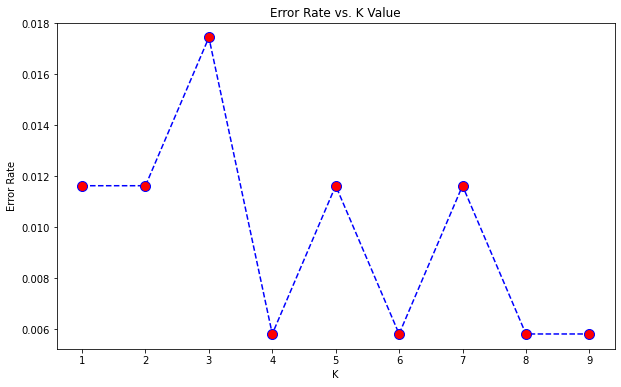

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,10),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

From the graph, we can notice that the best value for 'k' is **6.**

In [ ]:
# Best fitting Model:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train,y_train)
preds_knn = knn.predict(X_test)

print(confusion_matrix(y_test,preds_knn))
# Checking final Classification Report
print(classification_report(y_test,preds_knn))

[[74  0  0]
 [ 1 60  0]
 [ 0  0 37]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        74
           1       1.00      0.98      0.99        61
           2       1.00      1.00      1.00        37

    accuracy                           0.99       172
   macro avg       1.00      0.99      1.00       172
weighted avg       0.99      0.99      0.99       172



Hence, we achieved **99% accuracy.** 